In [2]:
import pandas as pd
import numpy as np
import os

In [65]:
!pip install flaml

     ------------------------------------- 205.2/205.2 kB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 16.4 MB/s eta 0:00:00
     --------------------------------------- 89.1/89.1 MB 12.9 MB/s eta 0:00:00


# Reading datasets

In [3]:
sales=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Sales_Ratings_Reviews_neutro.xlsx', sheet_name='Sales_Data')
sales

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,prep_instructions_required_vc,prep_instructions_vendor_state_vc,brand_code_vc,brand_vc,manufacturer_code_vc,parent_manufacturer_code_vc,local_currency,target_currency,ex_rate,date&asin
0,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44470_B000W6PY1W
1,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,Vendor,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44470_B071936B11
2,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,"Set creation, Bagging",Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44470_B075KJBF9H
3,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44470_B07BVW522M
4,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,"Bagging, Set creation",Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44470_B07JMXSSYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14351,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44624_B08TJRPMQH
14352,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44624_B08TJVD6TW
14353,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,CPEX Certified,NEUXP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44624_B094GC1G7N
14354,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,-,-,NEUXP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.198843,44624_B09GYRXP9P


# Reading Datasets for uncommon columns in the filtered dataset and changing the format of datetime

In [4]:
df_reviews1=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Sales_Ratings_Reviews_neutro.xlsx', sheet_name='unique_col_reviews')
df_reviews1

,date,asin,summary_pr,text_pr,star_rating_pr,unique_pr,duplicate_group_pr,review_url_pr,manufacturer_comment_pr,manufacturer_comment_text_pr,manufacturer_comment_date_pr,has_image_pr,ukey_pr,author_pr,date&asin
0,2022-04-05,B082VMNCNV,Salicylsäure Maske Top !,Salicylsäure-Maske Top ! Muss sagen es glättet...,5,1,ac233f7e2cb51e79bcd756a6ed27511e,https://www.amazon.de/gp/customer-reviews/R3OG...,0,NaN,NaN,0,89ffa859d8c35f91f7b3aa9a2814ae14,amazon_2008_DVD,44656_B082VMNCNV
1,2022-04-13,B082VMNCNV,Does what it says,It's not so hard on the skin but does work. sk...,5,1,2148a42f918d60a38c24066d9e46d2c6,https://www.amazon.de/gp/customer-reviews/R1VE...,0,NaN,NaN,0,aea1f6580ce8fb924307cbea459cb812,Eva,44664_B082VMNCNV
2,2022-04-24,B082VMNCNV,Fazit nach einem Jahr,"Nun nach der Zeit kann ich sagen, dass die Pro...",2,1,815d756a15f03c2adffed505948d80a2,https://www.amazon.de/gp/customer-reviews/R2UP...,0,NaN,NaN,0,cd42d67447ccc2492db823b9e51fbc40,Imp,44675_B082VMNCNV
3,2022-06-06,B082VMNCNV,Macht die Haut reiner,Ist einfach anzuwenden und das Hautbild wird t...,4,1,812c16799d89c56b11b5e08902565985,https://www.amazon.de/gp/customer-reviews/R1E7...,0,NaN,NaN,0,4d424fbf17c7a044a56d255e73fef802,Anonym,44718_B082VMNCNV
4,2022-06-16,B082VMNCNV,Gut,Gut,5,1,2997449e348b2a4bf963e82c8873f2f8,https://www.amazon.de/gp/customer-reviews/R2O4...,0,NaN,NaN,0,e56ee452f4de4d5775a246ebfa9ac49f,deniz,44728_B082VMNCNV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,2022-03-29,B094GC1G7N,Leichte Gesichtscreme,"Eine super leichte , feuchtigkeitsreiche Creme...",5,0,cbfeb1eb820c029f4351e8af73816833,https://www.amazon.de/gp/customer-reviews/RBN7...,0,NaN,NaN,0,5423d83f5c84c7fdb52566d98491e586,Irina Hof,44649_B094GC1G7N
5339,2022-03-30,B094GC1G7N,Einfach super,Hatte sie immer wieder gekauft in den letzten ...,5,0,925e9103194684c9d065d845b3f4acc2,https://www.amazon.de/gp/customer-reviews/RDX3...,0,NaN,NaN,0,3a66637651786b79ec6df00020e2f073,Patrick Buron,44650_B094GC1G7N
5340,2022-04-07,B094GC1G7N,Gut,Hat mir gefallen,5,0,28b2da8b002f1d6f746f9af2a8740172,https://www.amazon.de/gp/customer-reviews/RT7M...,0,NaN,NaN,0,788864e1d96f3788d5b5554430b915bd,Rolski Alexandra,44658_B094GC1G7N
5341,2022-04-21,B094GC1G7N,Ich bin zufrieden...,Ich nutze die Tagescreme seit Jahren. Habe jet...,5,0,b951d3b4e3fc8d6c7a743b9f78e466e1,https://www.amazon.de/gp/customer-reviews/R36A...,0,NaN,NaN,0,d71ee80e4d7dd4947c3fb544fd6b29ec,Kindle-Kunde,44672_B094GC1G7N


In [5]:
df_ratings1=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Sales_Ratings_Reviews_neutro.xlsx', sheet_name='unique_col_ratings')
df_ratings1 

,date,asin,match_type_pr,cumulative_star_rating_pr,cumulative_reviews_pr,cumulative_5_star_reviews_pr,cumulative_4_star_reviews_pr,cumulative_3_star_reviews_pr,cumulative_2_star_reviews_pr,cumulative_1_star_reviews_pr,url_pr,date&asin
0,44358,B000W6PY1W,EXACT,4.4,907,599.0,154.0,100.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1,44358_B000W6PY1W
1,44360,B000W6PY1W,EXACT,4.4,910,601.0,155.0,100.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1,44360_B000W6PY1W
2,44361,B000W6PY1W,EXACT,4.4,915,604.0,156.0,101.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1,44361_B000W6PY1W
3,44363,B000W6PY1W,EXACT,4.4,919,606.0,156.0,101.0,28.0,28.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1,44363_B000W6PY1W
4,44364,B000W6PY1W,EXACT,4.4,921,607.0,157.0,101.0,28.0,28.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1,44364_B000W6PY1W
...,...,...,...,...,...,...,...,...,...,...,...,...
9193,44745,B09GYRXP9P,EXACT,4.4,49,30.0,15.0,2.0,1.0,1.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1,44745_B09GYRXP9P
9194,44746,B09GYRXP9P,EXACT,4.3,51,29.0,14.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1,44746_B09GYRXP9P
9195,44749,B09GYRXP9P,EXACT,4.4,52,30.0,14.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1,44749_B09GYRXP9P
9196,44753,B09GYRXP9P,EXACT,4.4,54,30.0,16.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1,44753_B09GYRXP9P


In [12]:
import datetime

In [24]:
df_ratings1['date']=pd.to_datetime(df_ratings1['date'].astype(str))

In [25]:
df_ratings1

,date,asin,match_type_pr,cumulative_star_rating_pr,cumulative_reviews_pr,cumulative_5_star_reviews_pr,cumulative_4_star_reviews_pr,cumulative_3_star_reviews_pr,cumulative_2_star_reviews_pr,cumulative_1_star_reviews_pr,url_pr
0,1970-01-01,B000W6PY1W,EXACT,4.4,907,599.0,154.0,100.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1
1,1970-01-01,B000W6PY1W,EXACT,4.4,910,601.0,155.0,100.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1
2,1970-01-01,B000W6PY1W,EXACT,4.4,915,604.0,156.0,101.0,27.0,27.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1
3,1970-01-01,B000W6PY1W,EXACT,4.4,919,606.0,156.0,101.0,28.0,28.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1
4,1970-01-01,B000W6PY1W,EXACT,4.4,921,607.0,157.0,101.0,28.0,28.0,https://www.amazon.de/dp/B000W6PY1W/?psc=1
...,...,...,...,...,...,...,...,...,...,...,...
9193,1970-01-01,B09GYRXP9P,EXACT,4.4,49,30.0,15.0,2.0,1.0,1.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1
9194,1970-01-01,B09GYRXP9P,EXACT,4.3,51,29.0,14.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1
9195,1970-01-01,B09GYRXP9P,EXACT,4.4,52,30.0,14.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1
9196,1970-01-01,B09GYRXP9P,EXACT,4.4,54,30.0,16.0,3.0,3.0,2.0,https://www.amazon.de/dp/B09GYRXP9P/?psc=1


In [26]:
df_placement1=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Placement_neutro.xlsx',sheet_name='uncommon_col_data')
df_placement1  

,date,asin,keyword_pr,page_placement_pr,actual_rank_pr,organic_rank_pr,sponsored_rank_pr,sponsored_pr,third_party_only_pr,amazon_choice_pr,amazon_bestseller_pr,prime_pantry_pr,amazon_subscribe_and_save_pr,amazon_prime_pr,amazon_addon_item_pr,review_count_pr,number_of_images_pr,type_pr,date&asin
0,44481,B08HT315T6,neutrogena,1,2,NaN,2.0,True,True,False,False,False,False,False,False,62.0,8,brand_keyword,44481_B08HT315T6
1,44481,B08HT315T6,neutrogena,1,5,1.0,NaN,False,True,True,True,False,True,True,True,62.0,8,brand_keyword,44481_B08HT315T6
2,44481,B08HT315T6,bebe,3,123,NaN,27.0,True,True,False,False,False,False,False,False,62.0,8,brand_keyword,44481_B08HT315T6
3,44481,B08HT315T6,listerine mundspülung,2,63,NaN,15.0,True,True,False,False,False,False,False,False,62.0,8,brand_keyword,44481_B08HT315T6
4,44481,B08HT315T6,neutrogena handcreme,1,41,32.0,NaN,False,True,False,False,False,False,False,False,62.0,8,brand_keyword,44481_B08HT315T6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167237,44620,B07CDMHVBZ,neutrogena bodylotion,2,68,52.0,NaN,False,False,False,False,False,False,False,False,96.0,6,brand_keyword,44620_B07CDMHVBZ
167238,44620,B07CDMHVBZ,neutrogena anti pickel,2,82,66.0,NaN,False,False,False,False,False,False,False,False,96.0,6,brand_keyword,44620_B07CDMHVBZ
167239,44620,B07CDMHVBZ,neutrogena hydro boost,2,75,59.0,NaN,False,False,False,False,False,False,False,False,96.0,6,brand_keyword,44620_B07CDMHVBZ
167240,44620,B07CDMHVBZ,neutrogena augencreme,1,40,32.0,NaN,False,False,False,False,False,False,False,False,96.0,6,brand_keyword,44620_B07CDMHVBZ


In [33]:
df_placement1['date']=pd.to_datetime(df_placement1['date'])

In [7]:
df_content1=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Data/Content_neutro.xlsx',sheet_name='Uncommon_col')
df_content1  

,date,asin,content_field_pr,condition_pr,compliance_manually_changed_pr,expected_content_pr,actual_content_pr,critical_pr,customer_product_pr,date&asin
0,44579,B000W6PY1W,A+ Content (Exists),Y,0.0,Exists,Yes,False,True,44579_B000W6PY1W
1,44579,B000W6PY1W,A+ Images (Exists),Y,0.0,1,5,False,True,44579_B000W6PY1W
2,44349,B000W6PY1W,Number of Images (Benchmark),Y,0.0,Exists,11,False,True,44349_B000W6PY1W
3,44282,B000W6PY1W,A+ Content (Exists),NaN,NaN,NaN,Yes,False,False,44282_B000W6PY1W
4,44282,B000W6PY1W,A+ Content (Exists),NaN,0.0,NaN,Yes,False,False,44282_B000W6PY1W
...,...,...,...,...,...,...,...,...,...,...
83441,44632,B09NS8Q51H,Length of Product Title (Benchmark),N,0.0,30 ≤ x ≤ 150 Characters,194: Neutrogena Anti-Pickel+ Tägliches Waschge...,True,True,44632_B09NS8Q51H
83442,44632,B09NS8Q51H,Number of Images (Benchmark),Y,0.0,6,7,False,True,44632_B09NS8Q51H
83443,44632,B09NS8Q51H,Number of Images (Count),Y,0.0,Exists,7,False,True,44632_B09NS8Q51H
83444,44632,B09NS8Q51H,Product Description (Benchmark),Y,0.0,=>80,173: Das Anti-Pickel+ Tägliches Waschgel von N...,True,True,44632_B09NS8Q51H


In [36]:
df_content1['date']=pd.to_datetime(df_content1['date'])

In [ ]:
df_reviews1=df_reviews1.drop('date&asin',axis=1)
df_ratings1=df_ratings1.drop('date&asin',axis=1)
df_placement1=df_placement1.drop('date&asin',axis=1)
df_content1=df_content1.drop('date&asin',axis=1)

# Merging Datasets for uncommon columns in the filtered dataset

In [28]:
df_mapped=pd.merge(sales,df_reviews1,on=['date','asin'], how='left')

In [29]:
df_mapped

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,star_rating_pr,unique_pr,duplicate_group_pr,review_url_pr,manufacturer_comment_pr,manufacturer_comment_text_pr,manufacturer_comment_date_pr,has_image_pr,ukey_pr,author_pr
0,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16882,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16883,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16884,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16885,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_mapped=pd.merge(df_mapped,df_ratings1,on=['date','asin'], how='left')
df_mapped

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,author_pr,match_type_pr,cumulative_star_rating_pr,cumulative_reviews_pr,cumulative_5_star_reviews_pr,cumulative_4_star_reviews_pr,cumulative_3_star_reviews_pr,cumulative_2_star_reviews_pr,cumulative_1_star_reviews_pr,url_pr
0,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16882,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16883,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16884,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16885,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_mapped=pd.merge(df_mapped,df_placement1,on=['date','asin'], how='left')
df_mapped

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,amazon_choice_pr,amazon_bestseller_pr,prime_pantry_pr,amazon_subscribe_and_save_pr,amazon_prime_pr,amazon_addon_item_pr,review_count_pr,number_of_images_pr,type_pr,date&asin_y
0,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16882,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16883,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16884,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16885,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_mapped=pd.merge(df_mapped,df_content1,on=['date','asin'], how='left')

In [38]:
df_mapped.shape

(16887, 155)

In [39]:
df_mapped

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,number_of_images_pr,type_pr,date&asin_y,content_field_pr,condition_pr,compliance_manually_changed_pr,expected_content_pr,actual_content_pr,critical_pr,customer_product_pr
0,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-10-01,39,2021,9,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16882,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16883,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16884,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16885,2022,2022-03-04,9,2022,3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#df_mapped["date"] = pd.to_datetime(df_mapped["date"])

In [42]:
!pip install pandas-profiling

In [ ]:
profile=ProfileReport(df_mapped, title='Pandas Profiling Report')

In [ ]:
profile.to_file("my_report.html")

In [45]:
!pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 21.9 MB/s eta 0:00:00


In [46]:
import sweetviz as sv

In [48]:
df=df_mapped.drop(['upc_vc','clothing_size_vc','model_style_number_vc'],axis=1)

In [50]:
df_mapped['colour_vc'].replace({'UNKNOWN':'-','Blau':'Black', 'blau':'Black', 'white':'White'},inplace=True)
df_mapped['clothing_size_vc'].replace({'UNKNOWN':'-'},inplace=True)

In [52]:
df_mapped['clothing_size_vc'].value_counts()

50     4464
150    3086
200    2894
15     1339
75      749
30      700
125     690
25      577
3       577
400     561
1       548
2       368
-        78
Name: clothing_size_vc, dtype: int64

In [56]:
eda=sv.analyze(df)
eda.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object'

C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\Ankita\.conda\envs\abc\lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
C:\Users\Ankita\.co

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
From this report, you can delete all the variables with no unqiue values and check again with the code below

# checking for missing values and unique values

In [64]:
for col in df.columns:
    print(col, ':', df[col].nunique(),':', df[col].isna().sum())

year : 3 : 0
date : 551 : 0
weeknum : 53 : 0
fiscal_year : 3 : 0
fiscal_month : 12 : 0
retailer : 1 : 0
country : 1 : 0
manufacturer : 1 : 0
category : 1 : 0
brand : 1 : 0
asin : 31 : 0
title : 31 : 0
gfo : 1 : 0
gsr_level_1 : 1 : 0
gsr_level_2 : 3 : 0
gsr_level_3 : 1 : 6807
gsr_level_4 : 1 : 12298
is_competitor : 1 : 0
isavc_vc : 1 : 0
isinventory_vc : 2 : 0
issales_vc : 1 : 0
isprofitero_pr : 1 : 0
first_party_ordered_sales_vc : 4755 : 0
first_party_ordered_sales_currency_code_vc : 1 : 0
first_party_ordered_sales_local_vc : 7682 : 0
first_party_ordered_sales_local_currency_code_vc : 1 : 0
first_party_ordered_units_vc : 316 : 0
average_sales_price_vc : 219 : 367
first_party_shipped_sales_vc : 7547 : 0
first_party_shipped_sales_currency_code_vc : 1 : 0
shipped_cogs_amount_vc : 4319 : 0
shipped_cogs_currency_code_vc : 1 : 0
first_party_shipped_units_vc : 278 : 0
customer_return_vc : 32 : 0
free_replacements_vc : 7 : 0
preordered_revenue_amount_vc : 1 : 0
preordered_revenue_currency_code

Raw Dataset Consolidated shape= 99224, 154
After removing more than 50% missing values, data shape=99224,144
After removing variables with 0 variance, shape of the data= 99224, 137
After removing multicollinear variables, shape of the cleaned data= 99224,106

Need to further check the multicollinarity in the final cleaned dataset


In [30]:
per_missing1=df_mapped.isnull().sum()/len(df_mapped)

In [31]:
with pd.option_context("display.max_rows", None):
    display(per_missing1)

year                                                                          0.000000
date                                                                          0.000000
weeknum                                                                       0.000000
fiscal_year                                                                   0.000000
fiscal_month                                                                  0.000000
retailer                                                                      0.000000
country                                                                       0.000000
manufacturer                                                                  0.000000
category                                                                      0.000000
brand                                                                         0.000000
asin                                                                          0.000000
title                                      

dropping variables with more than 50% missing values

In [15]:
df_mapped.drop(['manufacturer_comment_date_pr','manufacturer_comment_text_pr','author_artist_vc'],
               axis=1, inplace=True)

In [16]:
df_mapped.drop(['promotion_price_pr','promotion_text_pr','gsr_level_4','gsr_level_3','promo_type_pr'],
               axis=1, inplace=True)

In [17]:
df_mapped.drop(['url_pr','review_url_pr'],axis=1, inplace=True)

In [18]:
df_mapped.shape

(99224, 144)

# Finding and Removing variables with 0 variance

In [47]:
df_describe=df_mapped.describe()

In [48]:
df_describe.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/df_statistics.csv')

From this initial level analysis, observing the mean and std, dropping all variables which have 0 
mean and std.

In [19]:
df_mapped.drop(['preordered_revenue_amount_vc','preordered_units_vc','inventory_sell_through_rate_vc',
               'add_on_item_pr','prime_exclusive_pr','manufacturer_comment_pr',
               'compliance_manually_changed_pr'],axis=1, inplace=True)

In [20]:
df_mapped.shape

(99224, 137)

# Before removing duplicates, finding correlation with conversion rate 

In [51]:
corr=df_mapped.corr()

In [52]:
corr

,year,weeknum,fiscal_year,fiscal_month,is_competitor,isinventory_vc,issales_vc,first_party_ordered_sales_vc,first_party_ordered_sales_local_vc,first_party_ordered_units_vc,...,amazon_choice_pr,amazon_bestseller_pr,prime_pantry_pr,amazon_subscribe_and_save_pr,amazon_prime_pr,amazon_addon_item_pr,review_count_pr,number_of_images_pr,critical_pr,customer_product_pr
year,1.000000,-0.683005,0.986021,-0.661615,NaN,-0.038309,NaN,-0.001057,-0.000035,-0.055353,...,0.066098,0.113163,0.092109,0.111368,0.111368,0.087837,0.305632,-0.058151,0.048094,-0.007464
weeknum,-0.683005,1.000000,-0.663462,0.965573,NaN,-0.000211,NaN,0.087099,0.088346,0.123038,...,-0.009932,-0.036633,-0.023513,-0.037340,-0.037340,-0.076774,-0.050166,-0.016794,0.127422,0.082586
fiscal_year,0.986021,-0.663462,1.000000,-0.683760,NaN,-0.038765,NaN,0.007795,0.008730,-0.046588,...,0.072279,0.117979,0.096845,0.116075,0.116075,0.090946,0.297159,-0.060575,0.047160,-0.005011
fiscal_month,-0.661615,0.965573,-0.683760,1.000000,NaN,0.001999,NaN,0.071924,0.073285,0.110965,...,-0.022751,-0.046125,-0.033414,-0.046617,-0.046617,-0.082814,-0.035034,-0.013622,0.127773,0.078765
is_competitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amazon_addon_item_pr,0.087837,-0.076774,0.090946,-0.082814,NaN,-0.005287,NaN,0.078429,0.078297,0.060164,...,0.680562,0.891445,0.687053,0.956015,0.956015,1.000000,-0.014462,-0.017513,-0.004120,-0.024617
review_count_pr,0.305632,-0.050166,0.297159,-0.035034,NaN,-0.007112,NaN,0.117920,0.118907,0.176765,...,0.080389,0.011160,-0.019284,0.008444,0.008444,-0.014462,1.000000,0.031715,0.079353,0.073295
number_of_images_pr,-0.058151,-0.016794,-0.060575,-0.013622,NaN,-0.081214,NaN,-0.049867,-0.050025,0.068246,...,-0.056913,-0.028399,-0.025600,-0.031259,-0.031259,-0.017513,0.031715,1.000000,-0.008052,-0.047848
critical_pr,0.048094,0.127422,0.047160,0.127773,NaN,0.001520,NaN,0.019113,0.019936,0.029915,...,0.030928,0.017964,0.020007,0.017144,0.017144,-0.004120,0.079353,-0.008052,1.000000,0.023738


In [53]:
corr.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/corr.csv')

# Segregating categorical and numerical features

In [24]:
df_num=df_mapped.select_dtypes(include=['int16','int32','int64','float64'])

In [25]:
df_num.shape

(99224, 61)

All numerical features which have more than 20% correlation with conversion rate are being considered

In [23]:
df_categorical = df_mapped.select_dtypes(exclude='number')
df_categorical

,retailer,country,manufacturer,category,brand,asin,title,gfo,gsr_level_1,gsr_level_2,...,amazon_subscribe_and_save_pr,amazon_prime_pr,amazon_addon_item_pr,type_pr,content_field_pr,condition_pr,expected_content_pr,actual_content_pr,critical_pr,customer_product_pr
0,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,A+ Content (Exists),Y,Exists,Yes,False,True
1,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,A+ Images (Exists),Y,1,5,False,True
2,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,A+ Content (Exists),Y,Exists,Yes,False,True
3,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,A+ Images (Exists),Y,1,5,False,True
4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,A+ Content (Exists),Y,Exists,Yes,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B0849D9GB4,Neutrogena Hydro Boost Aqua Gel (50ml) - Feuch...,Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,Length of Product Title (Benchmark),N,30 ≤ x ≤ 150 Characters,173: Neutrogena Hydro Boost Aqua Gel (50ml) - ...,True,True
99220,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B0849D9GB4,Neutrogena Hydro Boost Aqua Gel (50ml) - Feuch...,Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,Number of Images (Benchmark),Y,6,7,False,True
99221,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B0849D9GB4,Neutrogena Hydro Boost Aqua Gel (50ml) - Feuch...,Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,Number of Images (Count),Y,Exists,7,False,True
99222,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B0849D9GB4,Neutrogena Hydro Boost Aqua Gel (50ml) - Feuch...,Skin Health,Face Care,Moisturisers,...,False,False,False,brand_keyword,Product Description (Benchmark),Y,=>80,"116: Verschiedene Faktoren, wie externe Einflü...",True,True


In [24]:
df_categorical.shape

(99224, 75)

In [111]:
df_categorical['expected_content_pr'].value_counts()

Exists                     37957
1                          24301
30 ≤ x ≤ 150 Characters    12767
6                           7388
=>80                        7388
=>150                       5379
Exist                       2532
Neutrogena                    24
Name: expected_content_pr, dtype: int64

Selecting only those variables that are either binary or clear from the above analysis.
The list of selected categorical features are mentioned below

In [ ]:
Total 24 categorical features and 12 numerical features after feature selection through correlation
and a quick look of the value_counts of categorical features

In [25]:
df_mapped.columns

Index(['year', 'date', 'weeknum', 'fiscal_year', 'fiscal_month', 'retailer',
       'country', 'manufacturer', 'category', 'brand',
       ...
       'amazon_addon_item_pr', 'review_count_pr', 'number_of_images_pr',
       'type_pr', 'content_field_pr', 'condition_pr', 'expected_content_pr',
       'actual_content_pr', 'critical_pr', 'customer_product_pr'],
      dtype='object', length=137)

In [21]:
df_final_mapped=df_mapped[['year','date','weeknum','fiscal_month',
'first_party_ordered_sales_vc','asin',
'first_party_ordered_sales_local_vc',
'first_party_ordered_units_vc',
'first_party_shipped_sales_vc',
'shipped_cogs_amount_vc',
'first_party_shipped_units_vc',
'conversion_rate_vc',
'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
'unsellable_on_hand_units_vc',
'unfilled_customer_ordered_units_vc',
'ean_vc',
'cumulative_5_star_reviews_pr',
'number_of_images_pr','gsr_level_2', 'availability_pr','third_party_seller_pr','product_title_vc',
'product_group_vc','replenishment_code_vc','colour_vc',
'prep_instructions_vendor_state_vc','brand_code_vc','summary_pr','text_pr','keyword_pr',
'content_field_pr','condition_pr','sponsored_pr','third_party_only_pr','amazon_choice_pr',
'amazon_bestseller_pr','prime_pantry_pr','amazon_subscribe_and_save_pr','amazon_prime_pr',
'amazon_addon_item_pr','critical_pr','customer_product_pr','page_placement_pr','actual_rank_pr',
                          'organic_rank_pr','sponsored_rank_pr']]

In [22]:
df_final_mapped.columns

Index(['year', 'date', 'weeknum', 'fiscal_month',
       'first_party_ordered_sales_vc', 'asin',
       'first_party_ordered_sales_local_vc', 'first_party_ordered_units_vc',
       'first_party_shipped_sales_vc', 'shipped_cogs_amount_vc',
       'first_party_shipped_units_vc', 'conversion_rate_vc',
       'unsellable_on_hand_amount_trailing_30_day_average_amount_vc',
       'unsellable_on_hand_units_vc', 'unfilled_customer_ordered_units_vc',
       'ean_vc', 'cumulative_5_star_reviews_pr', 'number_of_images_pr',
       'gsr_level_2', 'availability_pr', 'third_party_seller_pr',
       'product_title_vc', 'product_group_vc', 'replenishment_code_vc',
       'colour_vc', 'prep_instructions_vendor_state_vc', 'brand_code_vc',
       'summary_pr', 'text_pr', 'keyword_pr', 'content_field_pr',
       'condition_pr', 'sponsored_pr', 'third_party_only_pr',
       'amazon_choice_pr', 'amazon_bestseller_pr', 'prime_pantry_pr',
       'amazon_subscribe_and_save_pr', 'amazon_prime_pr',
       'amazon

In [41]:
df_categorical=df_final_mapped[['gsr_level_2', 'availability_pr','third_party_seller_pr','product_title_vc',
'product_group_vc','replenishment_code_vc','colour_vc',
'prep_instructions_vendor_state_vc','brand_code_vc','summary_pr','text_pr','keyword_pr',
'content_field_pr','condition_pr','sponsored_pr','third_party_only_pr','amazon_choice_pr',
'amazon_bestseller_pr','prime_pantry_pr','amazon_subscribe_and_save_pr','amazon_prime_pr',
'critical_pr','customer_product_pr','conversion_rate_vc','page_placement_pr','actual_rank_pr',
'organic_rank_pr','sponsored_rank_pr']]

In [23]:
df_final_mapped.shape

(99224, 46)

# Doing an ANNOVA test between selected categorical features and CR to see if any features can be dropped

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'statsmodels'

In [31]:
for x in df_cat:
    model = ols('conversion_rate_vc' + '~' + x, data = df_final_mapped).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

               df      sum_sq   mean_sq            F  PR(>F)
asin         29.0  223.526283  7.707803  1810.320098     0.0
Residual  99194.0  422.338458  0.004258          NaN     NaN
                  df      sum_sq   mean_sq            F  PR(>F)
gsr_level_2      2.0   17.319681  8.659840  1367.026933     0.0
Residual     99221.0  628.545060  0.006335          NaN     NaN
                      df      sum_sq   mean_sq          F        PR(>F)
availability_pr      1.0    0.292299  0.292299  44.925222  2.057936e-11
Residual         99222.0  645.572442  0.006506        NaN           NaN
                            df      sum_sq   mean_sq          F        PR(>F)
third_party_seller_pr      2.0    0.273733  0.136867  24.365082  2.639108e-11
Residual               83737.0  470.377993  0.005617        NaN           NaN
                       df      sum_sq   mean_sq            F  PR(>F)
product_title_vc     27.0  223.250237  8.268527  1939.222033     0.0
Residual          98894.0  421.667929

In [39]:
for x in df_categorical:
    model = ols('conversion_rate_vc' + '~' + x, data = df_final_mapped).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

                  df      sum_sq   mean_sq            F  PR(>F)
gsr_level_2      2.0   17.319681  8.659840  1367.026933     0.0
Residual     99221.0  628.545060  0.006335          NaN     NaN
                      df      sum_sq   mean_sq          F        PR(>F)
availability_pr      1.0    0.292299  0.292299  44.925222  2.057936e-11
Residual         99222.0  645.572442  0.006506        NaN           NaN
                            df      sum_sq   mean_sq          F        PR(>F)
third_party_seller_pr      2.0    0.273733  0.136867  24.365082  2.639108e-11
Residual               83737.0  470.377993  0.005617        NaN           NaN
                       df      sum_sq   mean_sq            F  PR(>F)
product_title_vc     27.0  223.250237  8.268527  1939.222033     0.0
Residual          98894.0  421.667929  0.004264          NaN     NaN
                       df      sum_sq   mean_sq          F        PR(>F)
product_group_vc      1.0    0.348883  0.348883  53.541899  2.550445e-13
Resid

In [ ]:
### Dropping amazon add on item after running an ANNOVA between categorical features and Conversion rate

In [25]:
df_final_mapped.drop(['amazon_addon_item_pr'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df_final_mapped.shape

(99224, 46)

# Removing Duplicates from the final dataset

In [36]:
print(df_final_mapped[df_final_mapped.duplicated()])

       year                          date  weeknum  fiscal_month  \
80     2021 1970-01-01 00:00:00.000044304       16             4   
81     2021 1970-01-01 00:00:00.000044304       16             4   
82     2021 1970-01-01 00:00:00.000044304       16             4   
83     2021 1970-01-01 00:00:00.000044304       16             4   
84     2021 1970-01-01 00:00:00.000044304       16             4   
...     ...                           ...      ...           ...   
99205  2022 1970-01-01 00:00:00.000044624        9             3   
99206  2022 1970-01-01 00:00:00.000044624        9             3   
99207  2022 1970-01-01 00:00:00.000044624        9             3   
99208  2022 1970-01-01 00:00:00.000044624        9             3   
99209  2022 1970-01-01 00:00:00.000044624        9             3   

       first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
80                            222.7                              185.23   
81                            222

In [25]:
df_duplicates=df_final_mapped[df_final_mapped.duplicated()]
#df_duplicates.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/df_duplicates.csv')

In [28]:
df_duplicates.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/duplicates.csv')

In [26]:
df_final_mapped.drop_duplicates().shape

(55049, 46)

In [27]:
df_final_mapped.shape

(99224, 46)

In [31]:
df_clean=df_final_mapped.drop_duplicates()

In [32]:
df_clean.shape

(54875, 41)

###This is the final Dataset

In [34]:
df_clean.columns = [ i.replace('_', ' ') for i in df_clean.columns]

In [35]:
df_clean.columns = [ i.replace(' vc','') for i in df_clean.columns]
df_clean.columns = [ i.replace(' pr','') for i in df_clean.columns]

In [284]:
"hello world".title()

'Hello World'

In [36]:
df_clean.rename(columns = lambda x:x.title(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [37]:
df_clean.shape

(54875, 41)

In [38]:
df_clean.head()

,Year,Date,Weeknum,Fiscal Month,First Party Ordered Sales,Asin,First Party Ordered Sales Local,First Party Ordered Units,First Party Shipped Sales,Shipped Cogs Amount,...,Condition,Sponsored,Third Party Only,Amazon Choice,Amazon Bestseller,Prime Pantry,Amazon Subscribe And Save,Amazonime,Critical,Customeroduct
0,2021,44304,16,4,222.7,B07BVW522M,185.23,20,177.85,186.73,...,Y,True,True,False,False,False,False,False,False,True
1,2021,44304,16,4,222.7,B07BVW522M,185.23,20,177.85,186.73,...,Y,True,True,False,False,False,False,False,False,True
2,2021,44304,16,4,222.7,B07BVW522M,185.23,20,177.85,186.73,...,Y,False,True,False,False,False,False,False,False,True
3,2021,44304,16,4,222.7,B07BVW522M,185.23,20,177.85,186.73,...,Y,False,True,False,False,False,False,False,False,True
4,2021,44304,16,4,222.7,B07BVW522M,185.23,20,177.85,186.73,...,Y,False,True,False,False,False,False,False,False,True


In [126]:
df_fin.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/df_fin.csv')

In [49]:
df_fin.columns

Index(['Year', 'Date', 'Weeknum', 'Fiscal Month', 'First Party Ordered Sales',
       'First Party Ordered Sales Local', 'First Party Ordered Units',
       'First Party Shipped Sales', 'Shipped Cogs Amount',
       'First Party Shipped Units', 'Conversion Rate',
       'Unsellable On Hand Amount Trailing 30 Day Average Amount',
       'Unsellable On Hand Units', 'Unfilled Customer Ordered Units', 'Ean',
       'Cumulative 5 Star Reviews', 'Number Of Images', 'Gsr Level 2',
       'Availability', 'Third Party Seller', 'Product Title', 'Product Group',
       'Replenishment Code', 'Colour', 'Prep Instructions Vendor State',
       'Brand Code', 'Summary', 'Text', 'Keyword', 'Content Field',
       'Condition', 'Sponsored', 'Third Party Only', 'Amazon Choice',
       'Amazon Bestseller', 'Prime Pantry', 'Amazon Subscribe And Save',
       'Amazonime', 'Critical', 'Customeroduct'],
      dtype='object')

In [55]:
df_fin['Conversion_rate_categories']=np.where(df_fin['Conversion Rate']<0.10,"CR<10",np.where(df_fin['Conversion Rate']>=0.10,"CR 10-15",np.where(df_fin['Conversion Rate']<0.15,"CR 10-15",np.where(df_fin['Conversion Rate']>=0.15,"CR 15-20",np.where(df_fin['Conversion Rate']<0.20,"CR 15-20", "CR>20")))))

C:\Users\Ankita\AppData\Local\Temp/ipykernel_9876/130795155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['Conversion_rate_categories']=np.where(df_fin['Conversion Rate']<0.10,"CR<10",np.where(df_fin['Conversion Rate']>=0.10,"CR 10-15",np.where(df_fin['Conversion Rate']<0.15,"CR 10-15",np.where(df_fin['Conversion Rate']>=0.15,"CR 15-20",np.where(df_fin['Conversion Rate']<0.20,"CR 15-20", "CR>20")))))


In [39]:
df_clean.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/df_clean.csv')

In [ ]:
#df["age_group"]=np.where(df["Age"]<18, "Children", np.where(df["Age"]<=30 ,"Youth",np.where(df["Age"]<=60, "Adult","Senior")))

In [293]:
df_numerical=df_fin.select_dtypes(include=['int16','int32','int64','float64'])
df_numerical.shape

(54875, 13)

In [296]:
df_categorical=df_fin.select_dtypes(exclude=['number'])
df_categorical.shape

(54875, 24)

# EDA

since df_mapped already has categorical and numerical features segregated, doing a boxplot on
all the numerical features

# Intial Univariate Analysis- Numerical Features Distribution

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


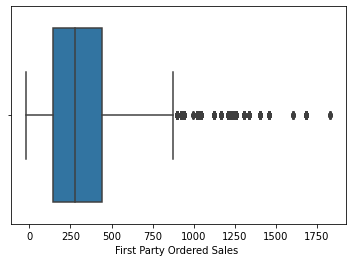

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


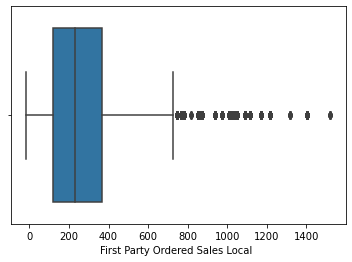

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


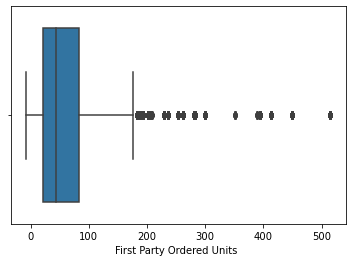

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


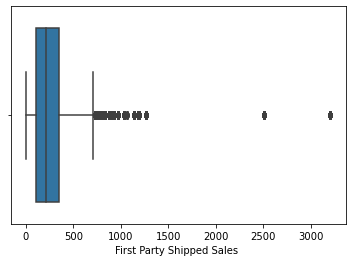

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


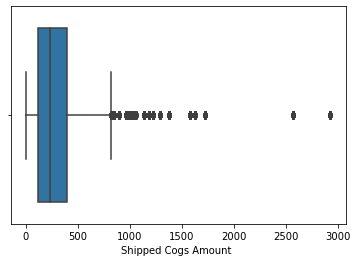

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


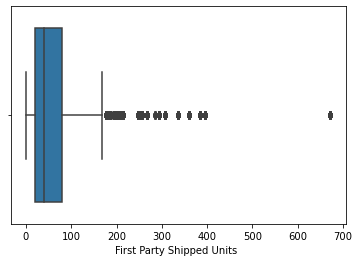

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


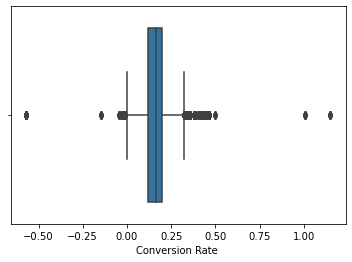

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


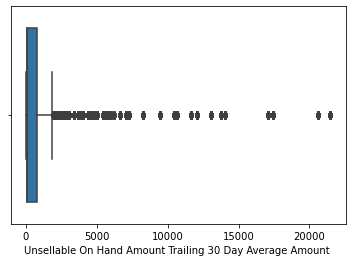

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


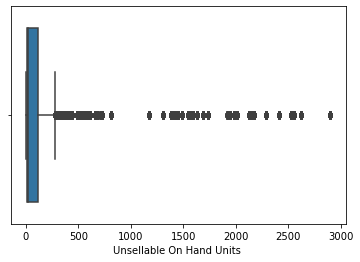

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


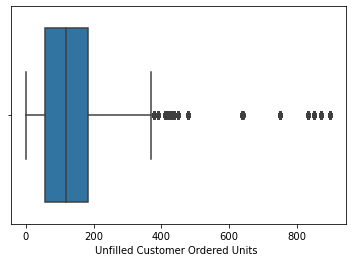

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


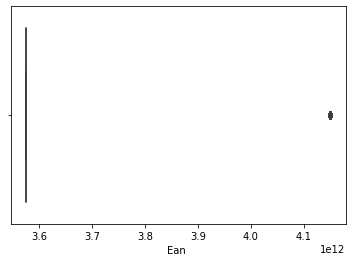

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


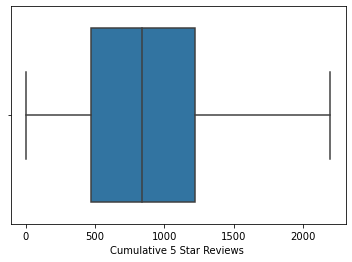

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


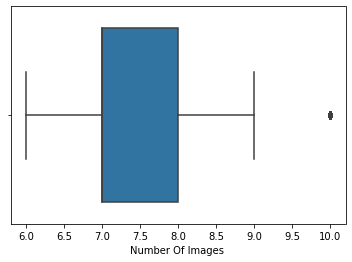

In [294]:
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

From this analysis you can see, that initial few numerical features like first_party_ordered_sales_vc,
first_party_ordered_sales_local_vc, first_party_shipped_sales_vc etc are left skewed with some 
possible outliers

Conversion rate too has a lot of outliers and slightly more normal distributed than the features
described above.

In [106]:
final_num_features.describe()

,first_party_ordered_sales_vc,first_party_ordered_sales_local_vc,first_party_ordered_units_vc,first_party_shipped_sales_vc,shipped_cogs_amount_vc,first_party_shipped_units_vc,conversion_rate_vc,unsellable_on_hand_amount_trailing_30_day_average_amount_vc,unsellable_on_hand_units_vc,unfilled_customer_ordered_units_vc,ean_vc,cumulative_5_star_reviews_pr,number_of_images_pr
count,99224.000000,99224.000000,99224.000000,99224.000000,99224.000000,99224.000000,99224.000000,99140.000000,99140.000000,99140.000000,9.892200e+04,99224.000000,99224.000000
mean,309.160691,257.608828,57.860296,251.594874,276.819084,56.959203,0.161763,1020.744656,218.992374,134.053470,3.614665e+12,822.186376,7.339968
std,241.740304,201.514529,58.247088,225.752356,262.247219,58.671371,0.080680,2589.054805,487.693734,111.621614,1.463637e+11,450.991146,0.953400
min,-21.200000,-17.680000,-8.000000,0.000000,0.000000,0.000000,-0.571400,0.000000,0.000000,0.000000,3.574661e+12,1.000000,6.000000
25%,134.600000,112.040000,19.000000,97.970000,104.020000,18.000000,0.117600,46.740000,6.000000,53.000000,3.574661e+12,436.000000,7.000000
50%,264.300000,219.680000,43.000000,205.080000,214.200000,40.000000,0.161700,101.690000,18.000000,115.000000,3.574662e+12,800.000000,7.000000
75%,433.600000,361.320000,84.000000,347.820000,374.670000,78.000000,0.198300,803.590000,130.000000,181.000000,3.574662e+12,1163.000000,8.000000
max,1831.800000,1520.990000,515.000000,3206.400000,2924.180000,672.000000,1.150000,21474.050000,2898.000000,898.000000,4.150173e+12,2198.000000,10.000000


# Categorical Features Distribution

In [97]:
df_final_cat.head()

,gsr_level_2,availability_pr,third_party_seller_pr,product_title_vc,product_group_vc,replenishment_code_vc,colour_vc,prep_instructions_vendor_state_vc,brand_code_vc,summary_pr,...,sponsored_pr,third_party_only_pr,amazon_choice_pr,amazon_bestseller_pr,prime_pantry_pr,amazon_subscribe_and_save_pr,amazon_prime_pr,amazon_addon_item_pr,critical_pr,customer_product_pr
0,Moisturisers,Y,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Beauty,PR,UNKNOWN,Amazon,NEUVP,Perfekt,...,True,True,False,False,False,False,False,False,False,True
1,Moisturisers,Y,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Beauty,PR,UNKNOWN,Amazon,NEUVP,Perfekt,...,True,True,False,False,False,False,False,False,False,True
2,Moisturisers,Y,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Beauty,PR,UNKNOWN,Amazon,NEUVP,Perfekt,...,False,True,False,False,False,False,False,False,False,True
3,Moisturisers,Y,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Beauty,PR,UNKNOWN,Amazon,NEUVP,Perfekt,...,False,True,False,False,False,False,False,False,False,True
4,Moisturisers,Y,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Beauty,PR,UNKNOWN,Amazon,NEUVP,Perfekt,...,False,True,False,False,False,False,False,False,False,True


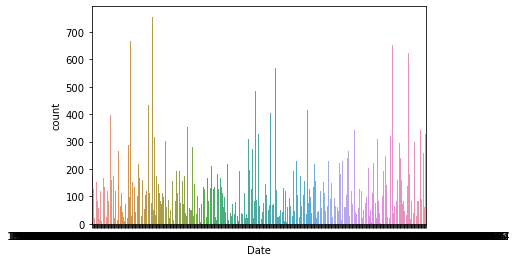

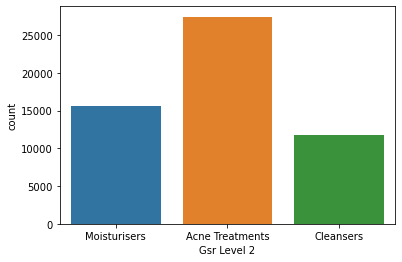

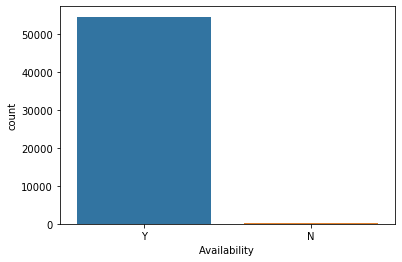

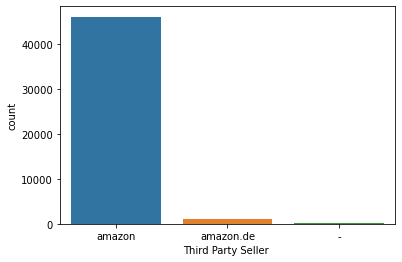

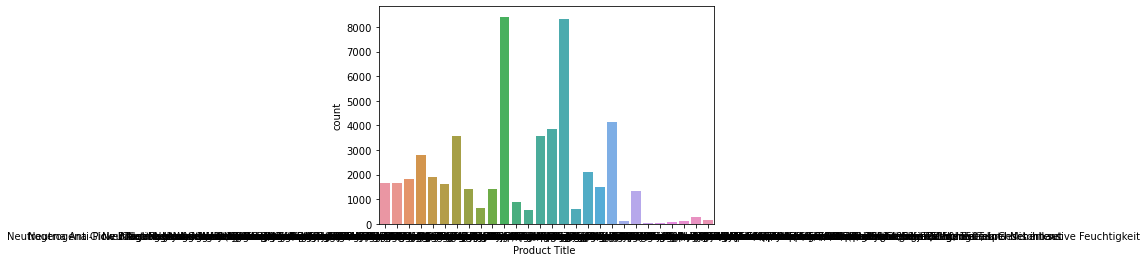

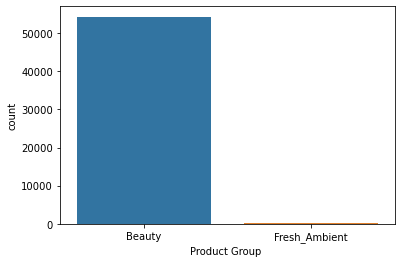

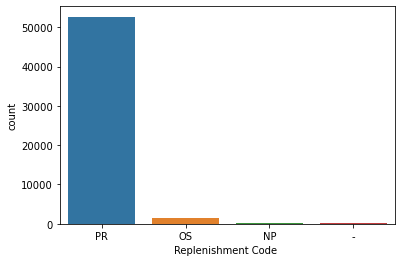

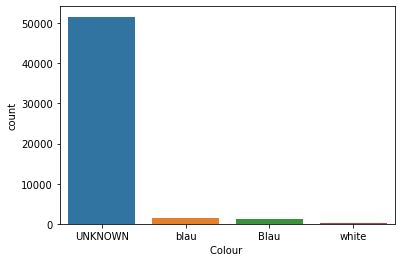

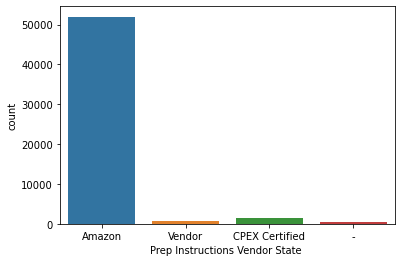

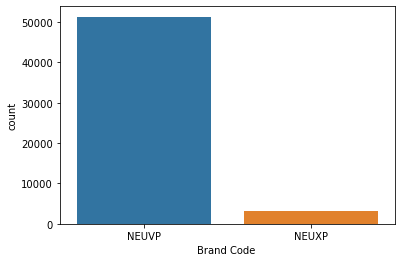

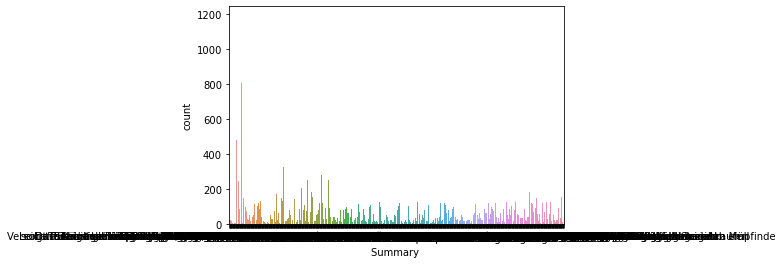

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9989 missing from current

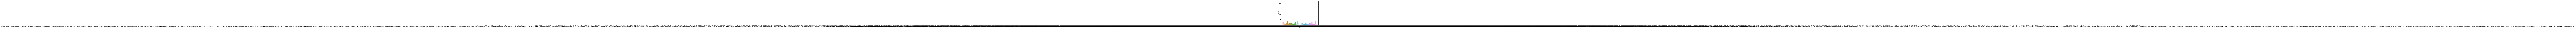

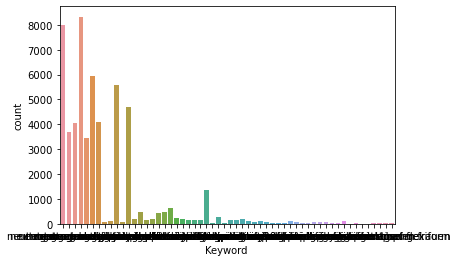

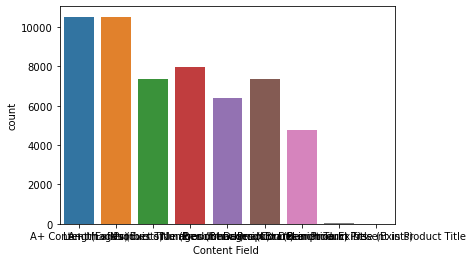

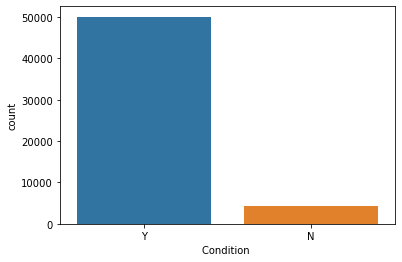

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [297]:
for i in df_categorical[1:]:
    sns.countplot(x=df_categorical[i],data=df_categorical)
    plt.pause(.05)

In [298]:
df_categorical.colums

Index(['Date', 'Gsr Level 2', 'Availability ', 'Third Party Seller ',
       'Product Title ', 'Product Group ', 'Replenishment Code ', 'Colour ',
       'Prep Instructions Vendor State ', 'Brand Code ', 'Summary ', 'Text ',
       'Keyword ', 'Content Field ', 'Condition ', 'Sponsored ',
       'Third Party Only ', 'Amazon Choice ', 'Amazon Bestseller ',
       'Prime Pantry ', 'Amazon Subscribe And Save ', 'Amazon Ime ',
       'Critical ', 'Customer Oduct '],
      dtype='object')

<AxesSubplot:xlabel='Sponsored ', ylabel='count'>

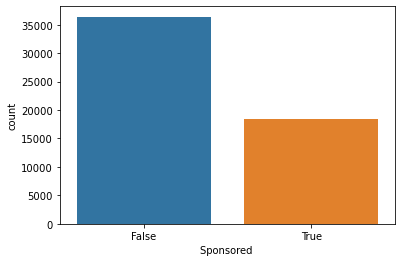

In [300]:
sns.countplot(x='Sponsored ',data=df_categorical)

<AxesSubplot:xlabel='Amazon Subscribe And Save ', ylabel='count'>

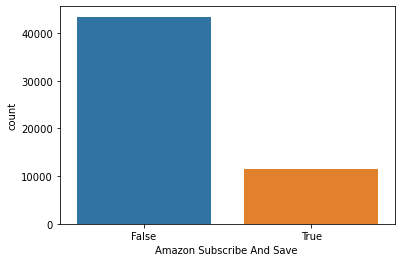

In [301]:
sns.countplot(x='Amazon Subscribe And Save ',data=df_categorical)

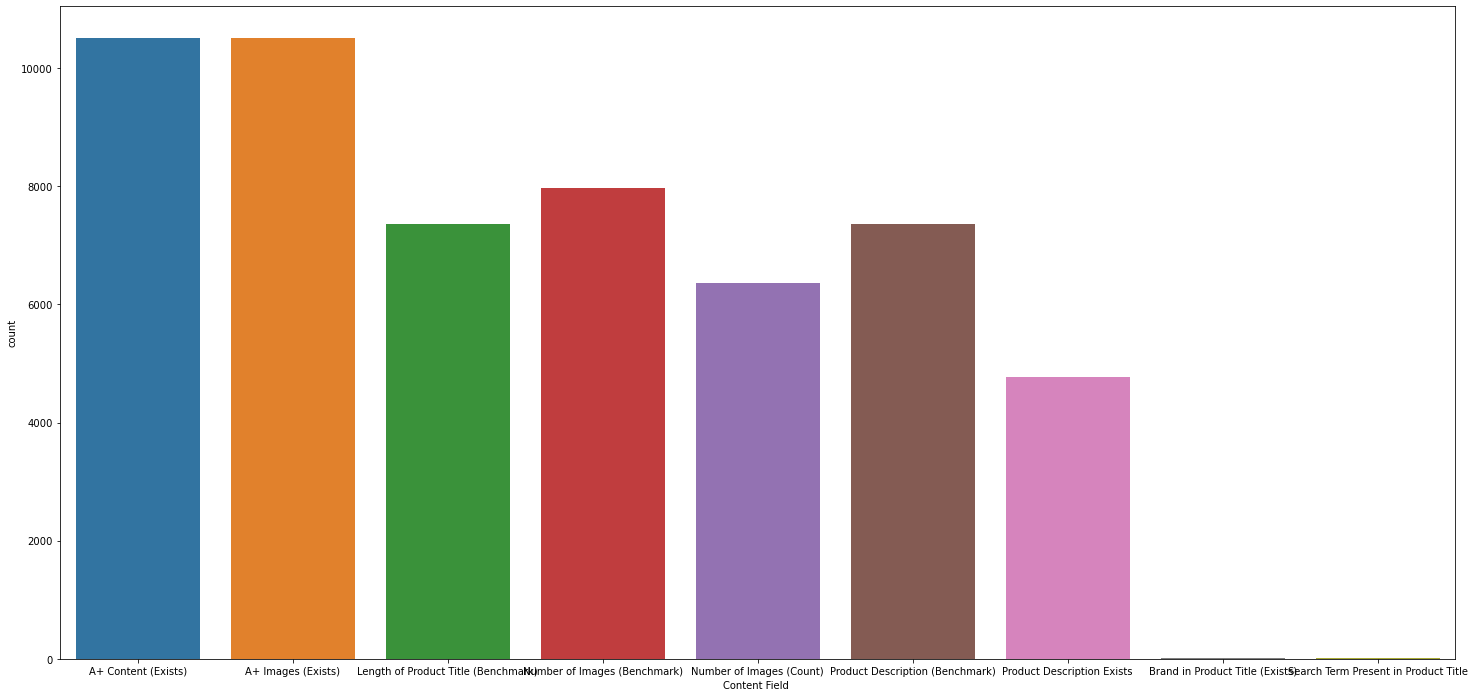

In [363]:
plt.figure(figsize = ( 25, 12))
sns.countplot(x='Content Field ',data=df_categorical)
plt.show()

<AxesSubplot:xlabel='Keyword ', ylabel='count'>

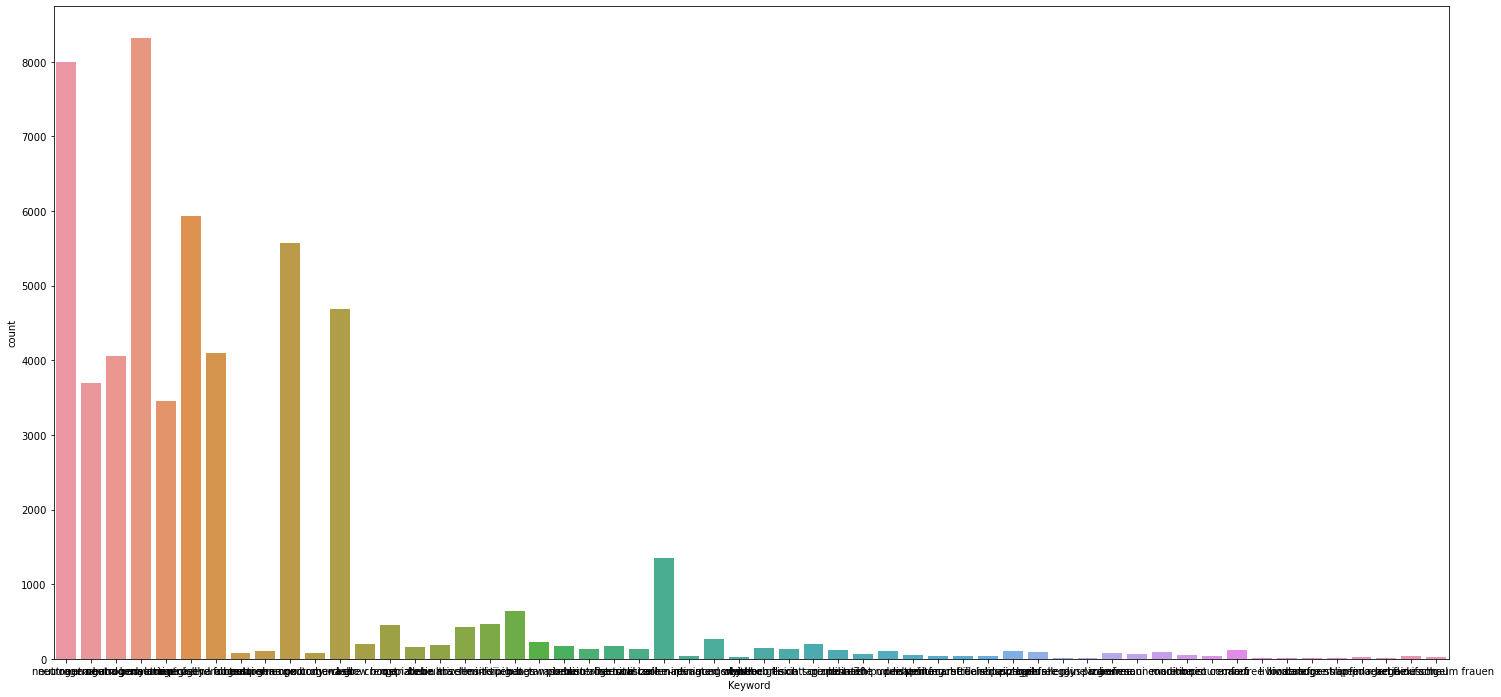

In [372]:
plt.figure(figsize = ( 25, 12))
sns.countplot(x='Keyword ',data=df_categorical)

<AxesSubplot:xlabel='Third Party Only ', ylabel='count'>

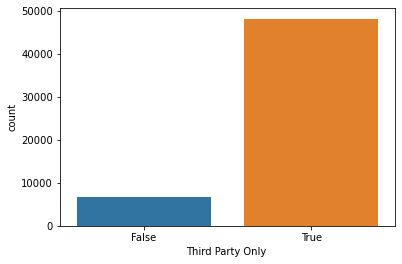

In [365]:
sns.countplot(x='Third Party Only ',data=df_categorical)

<AxesSubplot:xlabel='Amazon Choice ', ylabel='count'>

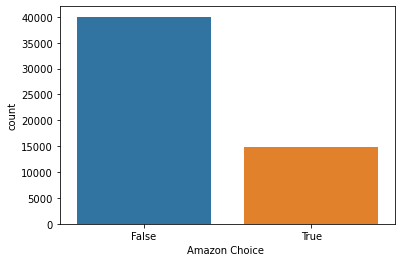

In [366]:
sns.countplot(x='Amazon Choice ',data=df_categorical)

<AxesSubplot:xlabel='Amazon Bestseller ', ylabel='count'>

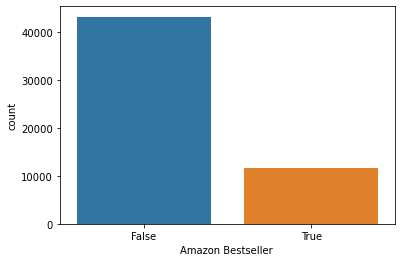

In [367]:
sns.countplot(x='Amazon Bestseller ',data=df_categorical)

<AxesSubplot:xlabel='Prime Pantry ', ylabel='count'>

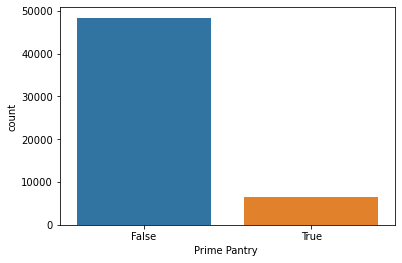

In [368]:
sns.countplot(x='Prime Pantry ',data=df_categorical)

<AxesSubplot:xlabel='Amazon Prime', ylabel='count'>

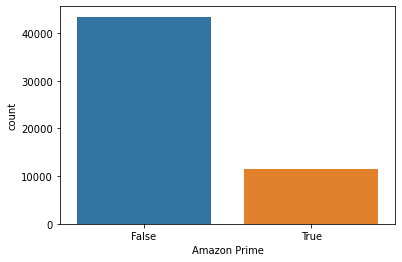

In [369]:
sns.countplot(x='Amazon Prime',data=df_fin)

<AxesSubplot:xlabel='Customer Product', ylabel='count'>

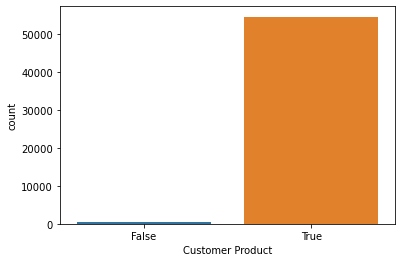

In [370]:
sns.countplot(x='Customer Product',data=df_fin)

<AxesSubplot:xlabel='Critical ', ylabel='count'>

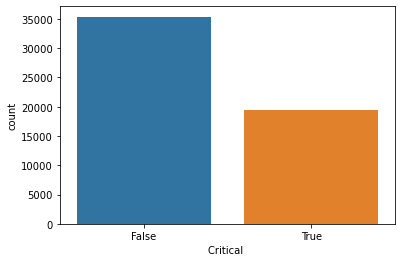

In [371]:
sns.countplot(x='Critical ',data=df_categorical)

# BIVARIATE ANALYSIS

Checking the relationship of the all the features with conversion rate. For numerical features,
a scatter plot is presented with conversion rate and for categorical features, a barplot is presented
to show the relationship with conversion rate

### First party ordered sales vs CR

In [303]:
df_fin.columns

Index(['Date', 'First Party Ordered Sales ',
       'First Party Ordered Sales Local ', 'First Party Ordered Units ',
       'First Party Shipped Sales ', 'Shipped Cogs Amount ',
       'First Party Shipped Units ', 'Conversion Rate ',
       'Unsellable On Hand Amount Trailing 30 Day Average Amount ',
       'Unsellable On Hand Units ', 'Unfilled Customer Ordered Units ', 'Ean ',
       'Cumulative 5 Star Reviews ', 'Number Of Images ', 'Gsr Level 2',
       'Availability ', 'Third Party Seller ', 'Product Title ',
       'Product Group ', 'Replenishment Code ', 'Colour ',
       'Prep Instructions Vendor State ', 'Brand Code ', 'Summary ', 'Text ',
       'Keyword ', 'Content Field ', 'Condition ', 'Sponsored ',
       'Third Party Only ', 'Amazon Choice ', 'Amazon Bestseller ',
       'Prime Pantry ', 'Amazon Subscribe And Save ', 'Amazon Ime ',
       'Critical ', 'Customer Oduct '],
      dtype='object')

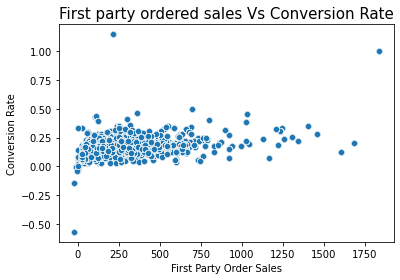

In [374]:
sns.scatterplot(x='First Party Ordered Sales ',y='Conversion Rate ',data=df_fin)

plt.xlabel( "First Party Order Sales" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First party ordered sales Vs Conversion Rate" , size = 15 )
  
# Display figure
plt.show()


### Scatter Polt with sub categories of GSR Level 2

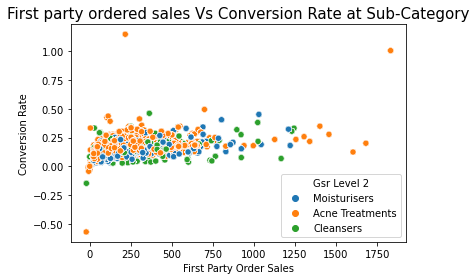

In [375]:
sns.scatterplot(x='First Party Ordered Sales ',y='Conversion Rate ',data=df_fin, hue='Gsr Level 2')

plt.xlabel( "First Party Order Sales" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First party ordered sales Vs Conversion Rate at Sub-Category" , size = 15 )
  
# Display figure
plt.show()


### First party ordered units vs CR

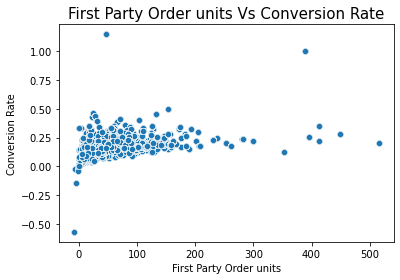

In [376]:
sns.scatterplot(x='First Party Ordered Units ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "First Party Order units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Order units Vs Conversion Rate" , size = 15 )
plt.show()

### Scatter Polt with sub categories of GSR Level 2

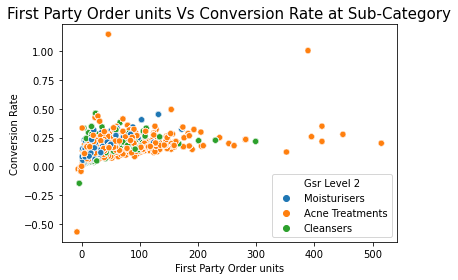

In [377]:
sns.scatterplot(x='First Party Ordered Units ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "First Party Order units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Order units Vs Conversion Rate at Sub-Category" , size = 15 )
plt.show()

### First party shipped sales vs CR

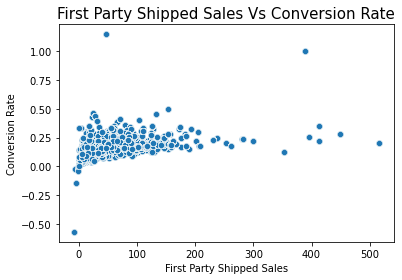

In [378]:
sns.scatterplot(x='First Party Ordered Units ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "First Party Shipped Sales" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Shipped Sales Vs Conversion Rate" , size = 15 )
plt.show()

### Scatter Polt with sub categories of GSR Level 2

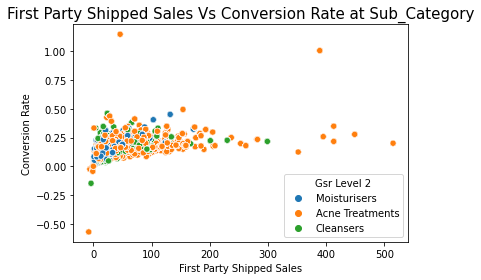

In [379]:
sns.scatterplot(x='First Party Ordered Units ',y='Conversion Rate ',data=df_fin, hue='Gsr Level 2')
plt.xlabel( "First Party Shipped Sales" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Shipped Sales Vs Conversion Rate at Sub_Category" , size = 15 )
plt.show()

### Shipped cogs amount vs CR

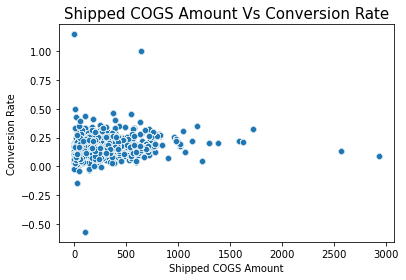

In [380]:
sns.scatterplot(x='Shipped Cogs Amount ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Shipped COGS Amount" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Shipped COGS Amount Vs Conversion Rate" , size = 15 )
plt.show()

In [ ]:
### Scatter Polt with sub categories of GSR Level 2

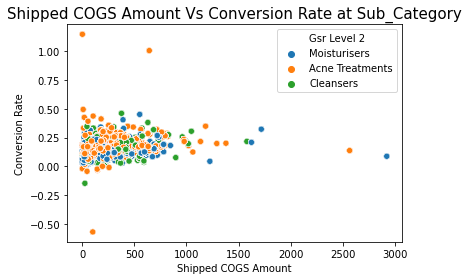

In [381]:
sns.scatterplot(x='Shipped Cogs Amount ',y='Conversion Rate ',data=df_fin, hue='Gsr Level 2')
plt.xlabel( "Shipped COGS Amount" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Shipped COGS Amount Vs Conversion Rate at Sub_Category" , size = 15 )
plt.show()

### First party shipped units vs CR

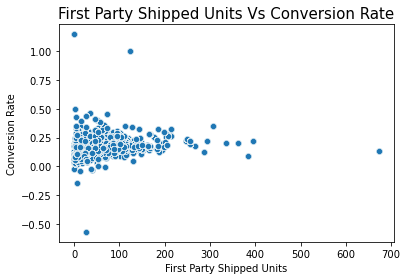

In [382]:
sns.scatterplot(x='First Party Shipped Units ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "First Party Shipped Units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Shipped Units Vs Conversion Rate" , size = 15 )
plt.show()

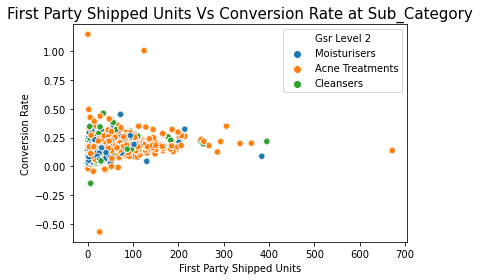

In [383]:
sns.scatterplot(x='First Party Shipped Units ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "First Party Shipped Units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "First Party Shipped Units Vs Conversion Rate at Sub_Category" , size = 15 )
plt.show()

### Cummulative 5-star reviews vs CR

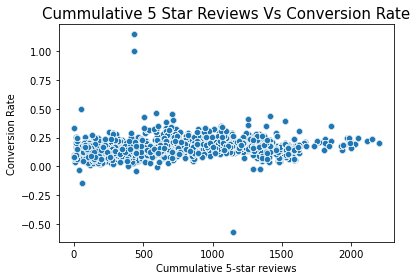

In [384]:
sns.scatterplot(x='Cumulative 5 Star Reviews ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Cummulative 5-star reviews" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Cummulative 5 Star Reviews Vs Conversion Rate" , size = 15 )
plt.show()

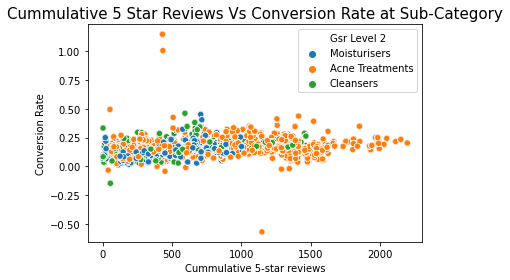

In [385]:
sns.scatterplot(x='Cumulative 5 Star Reviews ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Cummulative 5-star reviews" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Cummulative 5 Star Reviews Vs Conversion Rate at Sub-Category" , size = 15 )
plt.show()

### Unfilled customer ordered units vs CR

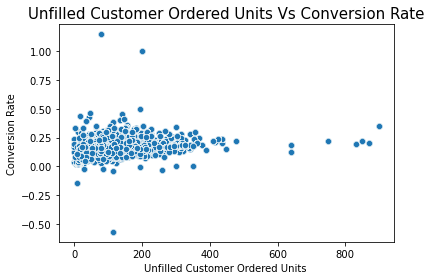

In [394]:
sns.scatterplot(x='Unfilled Customer Ordered Units ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Unfilled Customer Ordered Units " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unfilled Customer Ordered Units Vs Conversion Rate" , size = 15 )
plt.show()

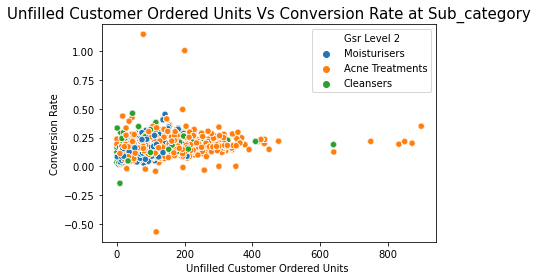

In [395]:
sns.scatterplot(x='Unfilled Customer Ordered Units ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Unfilled Customer Ordered Units " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unfilled Customer Ordered Units Vs Conversion Rate at Sub_category" , size = 15 )
plt.show()

### Unsellable on hand units vs CR

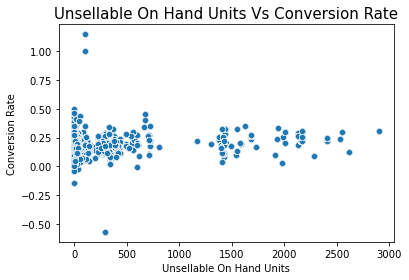

In [392]:
sns.scatterplot(x='Unsellable On Hand Units ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Unsellable On Hand Units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unsellable On Hand Units Vs Conversion Rate" , size = 15 )
plt.show()

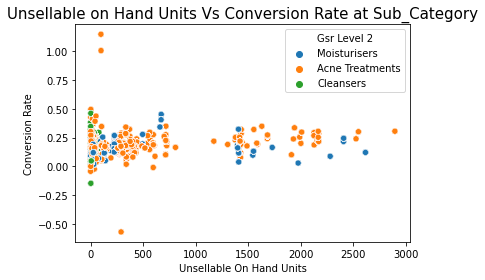

In [391]:
sns.scatterplot(x='Unsellable On Hand Units ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Unsellable On Hand Units" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unsellable on Hand Units Vs Conversion Rate at Sub_Category" , size = 15 )
plt.show()

### Unsellable on hand amount trailing 30 day average vs CR

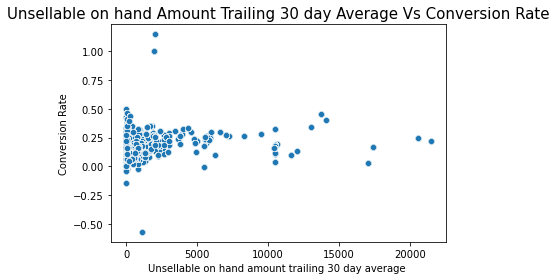

In [390]:
sns.scatterplot(x='Unsellable On Hand Amount Trailing 30 Day Average Amount ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Unsellable on hand amount trailing 30 day average " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unsellable on hand Amount Trailing 30 day Average Vs Conversion Rate" , size = 15 )
plt.show()

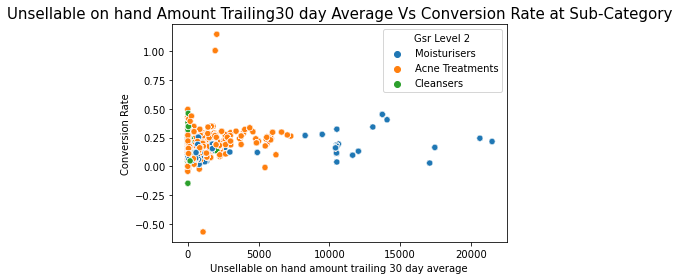

In [397]:
sns.scatterplot(x='Unsellable On Hand Amount Trailing 30 Day Average Amount ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2' )
plt.xlabel( "Unsellable on hand amount trailing 30 day average " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Unsellable on hand Amount Trailing"
          "30 day Average Vs Conversion Rate at Sub-Category" , size = 15 )
plt.show()

In [389]:
df_fin.columns

Index(['Date', 'First Party Ordered Sales ',
       'First Party Ordered Sales Local ', 'First Party Ordered Units ',
       'First Party Shipped Sales ', 'Shipped Cogs Amount ',
       'First Party Shipped Units ', 'Conversion Rate ',
       'Unsellable On Hand Amount Trailing 30 Day Average Amount ',
       'Unsellable On Hand Units ', 'Unfilled Customer Ordered Units ', 'Ean ',
       'Cumulative 5 Star Reviews ', 'Number Of Images ', 'Gsr Level 2',
       'Availability ', 'Third Party Seller ', 'Product Title ',
       'Product Group ', 'Replenishment Code ', 'Colour ',
       'Prep Instructions Vendor State ', 'Brand Code ', 'Summary ', 'Text ',
       'Keyword ', 'Content Field ', 'Condition ', 'Sponsored ',
       'Third Party Only ', 'Amazon Choice ', 'Amazon Bestseller ',
       'Prime Pantry ', 'Amazon Subscribe And Save ', 'Amazon Prime',
       'Critical ', 'Customer Product'],
      dtype='object')

# Bi-Variate Analysis on Categorical Variables

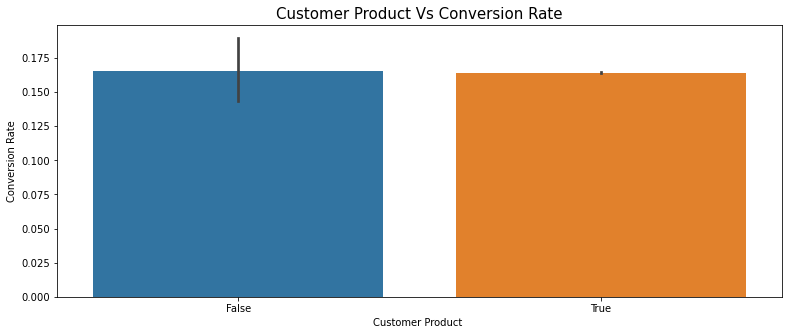

In [398]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Customer Product',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Customer Product " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Customer Product Vs Conversion Rate" , size = 15 )
plt.show()

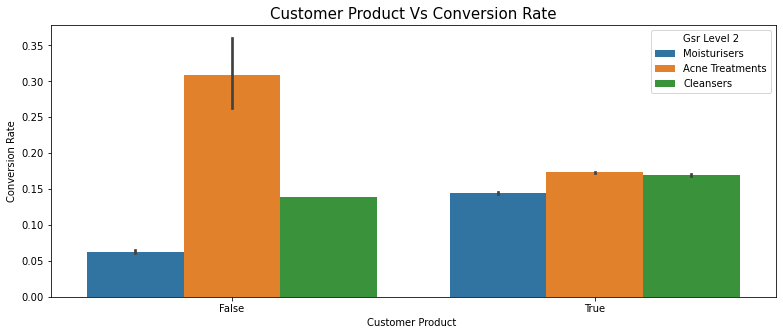

In [399]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Customer Product',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Customer Product " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Customer Product Vs Conversion Rate" , size = 15 )
plt.show()

<AxesSubplot:xlabel='content_field_pr'>

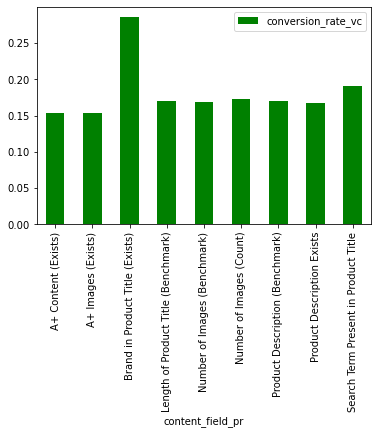

In [220]:
df_fin.pivot_table(index=["content_field_pr"], values=["conversion_rate_vc"],aggfunc=np.median).plot(kind="bar",  color=['green'])

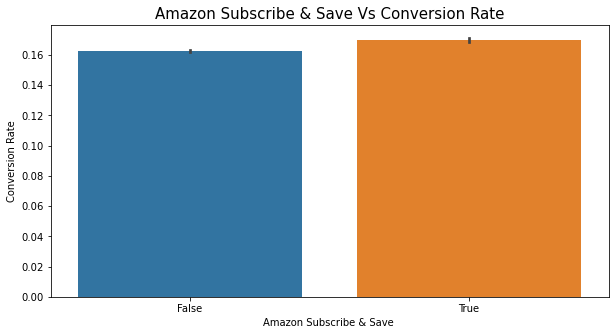

In [401]:
plt.figure(figsize = ( 10 , 5))
sns.barplot(x='Amazon Subscribe And Save ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Amazon Subscribe & Save " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Amazon Subscribe & Save Vs Conversion Rate" , size = 15 )
plt.show()

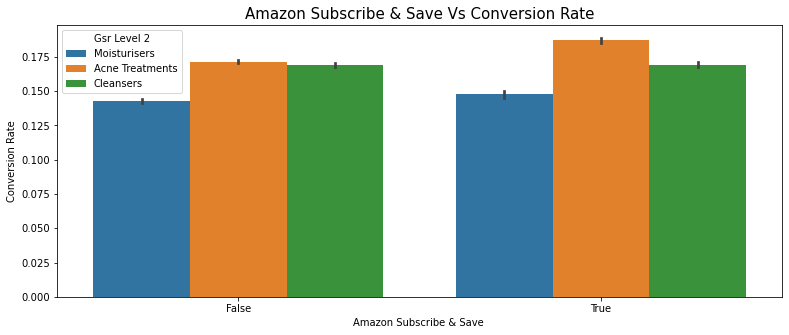

In [339]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Amazon Subscribe And Save ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Amazon Subscribe & Save " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Amazon Subscribe & Save Vs Conversion Rate" , size = 15 )
plt.show()

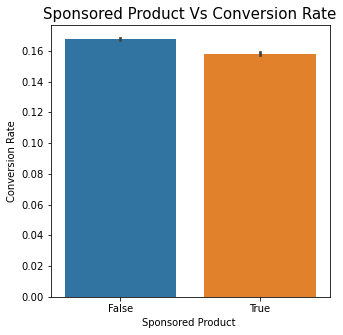

In [405]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Sponsored ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Sponsored Product " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Sponsored Product Vs Conversion Rate" , size = 15 )
plt.show()

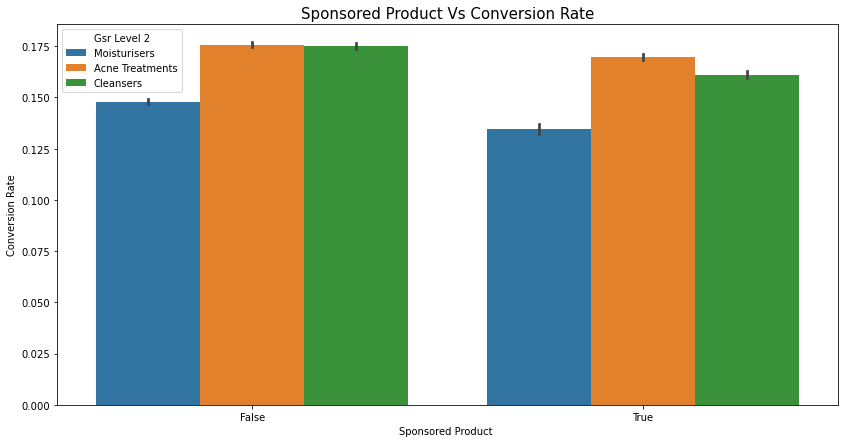

In [410]:
plt.figure(figsize = ( 14 , 7))
sns.barplot(x='Sponsored ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Sponsored Product " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Sponsored Product Vs Conversion Rate" , size = 15 )
plt.show()

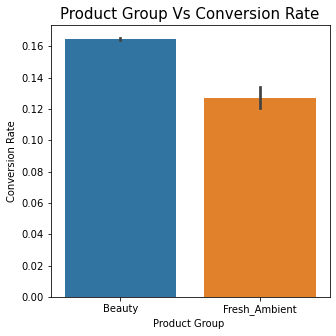

In [413]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Product Group ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Product Group " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Product Group Vs Conversion Rate" , size = 15)
plt.show()

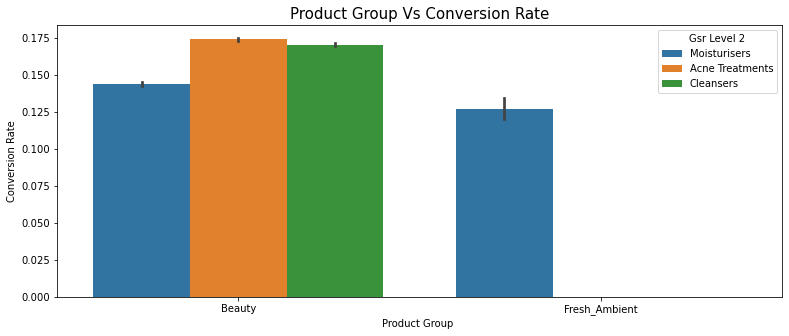

In [348]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Product Group ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Product Group " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Product Group Vs Conversion Rate" , size = 15)
plt.show()

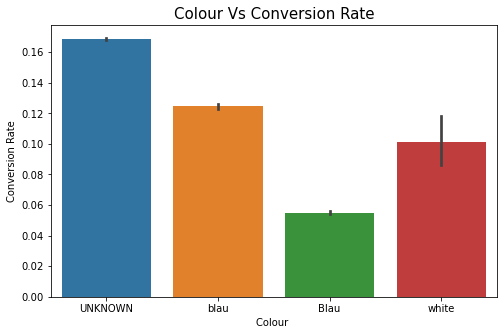

In [416]:
plt.figure(figsize = ( 8 , 5))
sns.barplot(x='Colour ',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Colour " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Colour Vs Conversion Rate" , size = 15 )
plt.show()

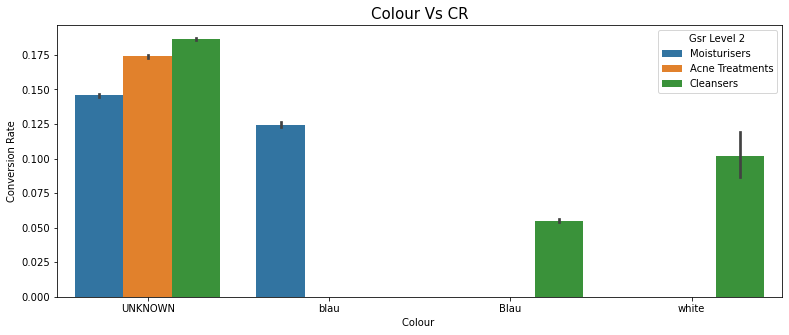

In [349]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Colour ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Colour " , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Colour Vs Conversion Rate" , size = 15 )
plt.show()

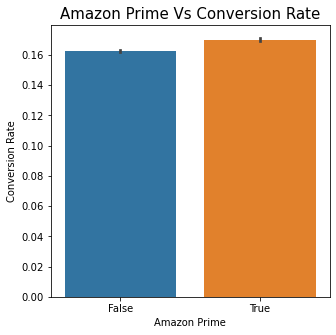

In [418]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Amazon Prime',y='Conversion Rate ',data=df_fin)
plt.xlabel( "Amazon Prime" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Amazon Prime Vs Conversion Rate" , size = 15 )
plt.show()

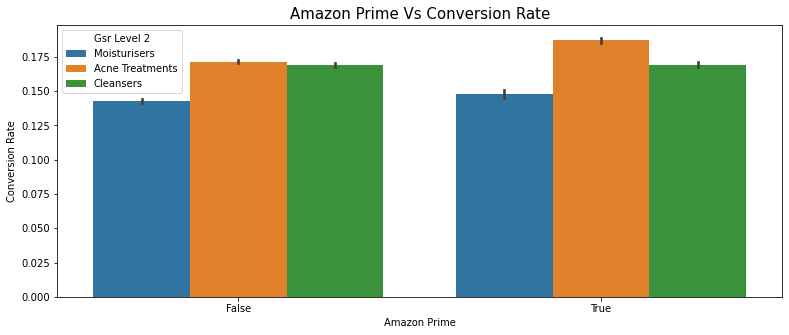

In [344]:
plt.figure(figsize = ( 13 , 5))
sns.barplot(x='Amazon Prime',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.xlabel( "Amazon Prime" , size = 10 )
plt.ylabel( "Conversion Rate" , size = 10 )
plt.title( "Amazon Prime Vs Conversion Rate" , size = 15 )
plt.show()

In [419]:
df_fin.columns

Index(['Date', 'First Party Ordered Sales ',
       'First Party Ordered Sales Local ', 'First Party Ordered Units ',
       'First Party Shipped Sales ', 'Shipped Cogs Amount ',
       'First Party Shipped Units ', 'Conversion Rate ',
       'Unsellable On Hand Amount Trailing 30 Day Average Amount ',
       'Unsellable On Hand Units ', 'Unfilled Customer Ordered Units ', 'Ean ',
       'Cumulative 5 Star Reviews ', 'Number Of Images ', 'Gsr Level 2',
       'Availability ', 'Third Party Seller ', 'Product Title ',
       'Product Group ', 'Replenishment Code ', 'Colour ',
       'Prep Instructions Vendor State ', 'Brand Code ', 'Summary ', 'Text ',
       'Keyword ', 'Content Field ', 'Condition ', 'Sponsored ',
       'Third Party Only ', 'Amazon Choice ', 'Amazon Bestseller ',
       'Prime Pantry ', 'Amazon Subscribe And Save ', 'Amazon Prime',
       'Critical ', 'Customer Product'],
      dtype='object')

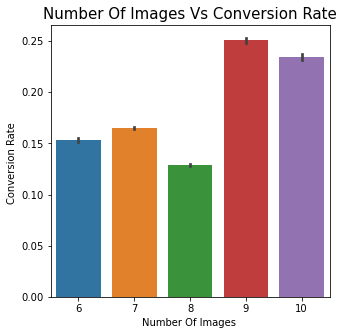

In [424]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Number Of Images ',y='Conversion Rate ',data=df_fin)
plt.title( "Number Of Images Vs Conversion Rate" , size = 15 )
plt.show()

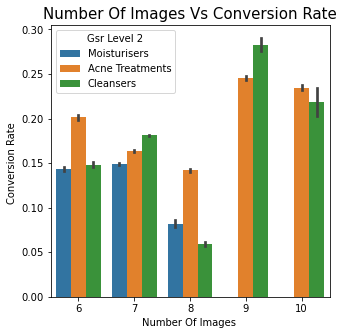

In [423]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Number Of Images ',y='Conversion Rate ',data=df_fin,hue='Gsr Level 2')
plt.title( "Number Of Images Vs Conversion Rate" , size = 15 )
plt.show()

# EDA on FINAL DATASET

In [184]:
df_final=pd.read_excel(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/month_Avg_CR1.xlsx',sheet_name='month_Avg_CR1')
df_final

PermissionError: [Errno 13] Permission denied: 'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/month_Avg_CR1.xlsx'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df_final.groupby(['Fiscal Month','Gsr Level 2','Conversion Rate'])[['Conversion Rate Categories']].count().reset_index()

,Fiscal Month,Gsr Level 2,Conversion Rate,Conversion Rate Categories
0,1,Acne Treatments,-0.0435,10
1,1,Acne Treatments,-0.0333,8
2,1,Acne Treatments,0.0000,26
3,1,Acne Treatments,0.0323,10
4,1,Acne Treatments,0.0385,28
...,...,...,...,...
1168,12,Moisturisers,0.1937,98
1169,12,Moisturisers,0.2054,77
1170,12,Moisturisers,0.2083,84
1171,12,Moisturisers,0.2286,35


In [138]:
month_Avg_CR=df_final.groupby(['Fiscal Month','Gsr Level 2','Conversion Rate Categories'])[['Conversion Rate']].mean().reset_index()

In [144]:
month_Avg_CR.head()

,Fiscal Month,Gsr Level 2,Conversion Rate Categories,Conversion Rate
0,1,Acne Treatments,CR 10-15,0.131229
1,1,Acne Treatments,CR 15-20,0.166520
2,1,Acne Treatments,CR<10,0.059590
3,1,Acne Treatments,CR>20,0.243694
4,1,Cleansers,CR 10-15,0.119415


In [166]:
df_acne=month_Avg_CR.loc[(month_Avg_CR['Gsr Level 2']=='Acne Treatments')]
#df.claim_amount.loc[(df.gender=='Male')]

In [167]:
df_acne

,Fiscal Month,Gsr Level 2,Conversion Rate Categories,Conversion Rate
0,1,Acne Treatments,CR 10-15,0.131229
1,1,Acne Treatments,CR 15-20,0.166520
2,1,Acne Treatments,CR<10,0.059590
3,1,Acne Treatments,CR>20,0.243694
12,2,Acne Treatments,CR 10-15,0.125125
13,2,Acne Treatments,CR 15-20,0.170673
14,2,Acne Treatments,CR<10,0.057425
15,2,Acne Treatments,CR>20,0.256842
24,3,Acne Treatments,CR 10-15,0.128899
25,3,Acne Treatments,CR 15-20,0.174030


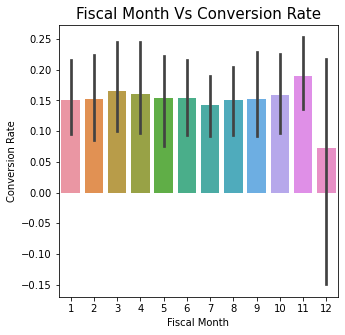

In [172]:
plt.figure(figsize = ( 5 , 5))
sns.barplot(x='Fiscal Month',y='Conversion Rate',data=df_acne)
plt.title( "Fiscal Month Vs Conversion Rate" , size = 15 )
plt.show()

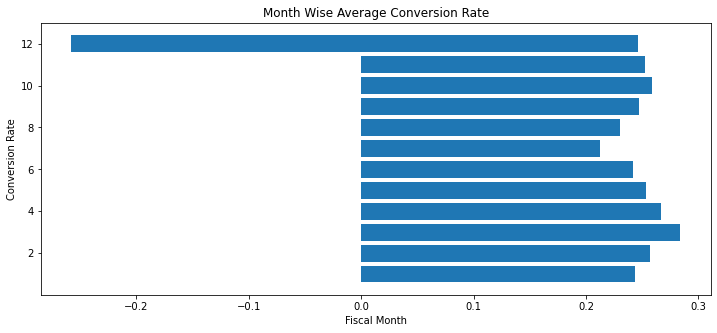

In [178]:
plt.figure(figsize = ( 12 , 5))
plt.barh(df_acne['Fiscal Month'],df_acne['Conversion Rate'])
plt.title('Month Wise Average Conversion Rate')
plt.ylabel('Conversion Rate')
plt.xlabel('Fiscal Month')
plt.show()

In [156]:
month_Avg_CR.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/month_Avg_CR1.csv')

In [154]:
week_Avg_CR.to_csv('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/week_Avg_CR.csv')

In [140]:
week_Avg_CR=df_final.groupby(['Weeknum','Gsr Level 2','Conversion Rate Categories'])[['Conversion Rate']].mean().reset_index()

In [143]:
week_Avg_CR.tail()

,Weeknum,Gsr Level 2,Conversion Rate Categories,Conversion Rate
415,52,Acne Treatments,CR>20,0.242900
416,52,Cleansers,CR>20,0.346900
417,52,Moisturisers,CR 10-15,0.137900
418,52,Moisturisers,CR 15-20,0.163287
419,52,Moisturisers,CR<10,0.080246
